In [6]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
plt.style.use('bmh')

## Numpy

In [2]:
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = iris.data

In [5]:
X.shape

(150, 4)

In [7]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
X_covariance_matrix = np.cov(X_std.T)
X_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [10]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624865,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494768,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.02085386217646253,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329987, 22.85076178670177, 3.668921889282871, 0.5178709107154866]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [15]:
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624865,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494768,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.02085386217646253,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------------------------------------
Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


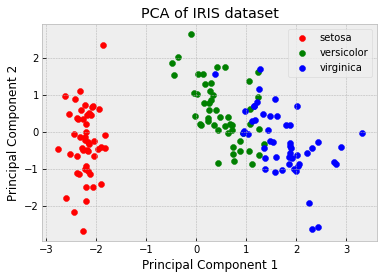

In [19]:
Y = X_std.dot(matrix_w)
print(Y[0:5])


plt.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

## Sklearn

In [20]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [30]:
x_pca=pca.transform(X_std)

In [31]:
x_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

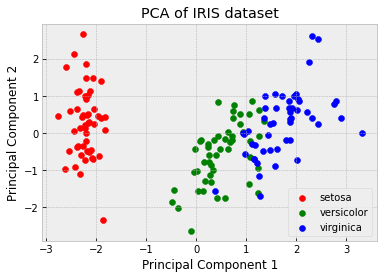

In [33]:
plt.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(x_pca[y==i,0], x_pca[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()